<a href="https://colab.research.google.com/github/nikhil-xyz/Machine-Learning-Practice/blob/main/AdaBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

()
Best n_estimators: 10
Accuracy: 1.0


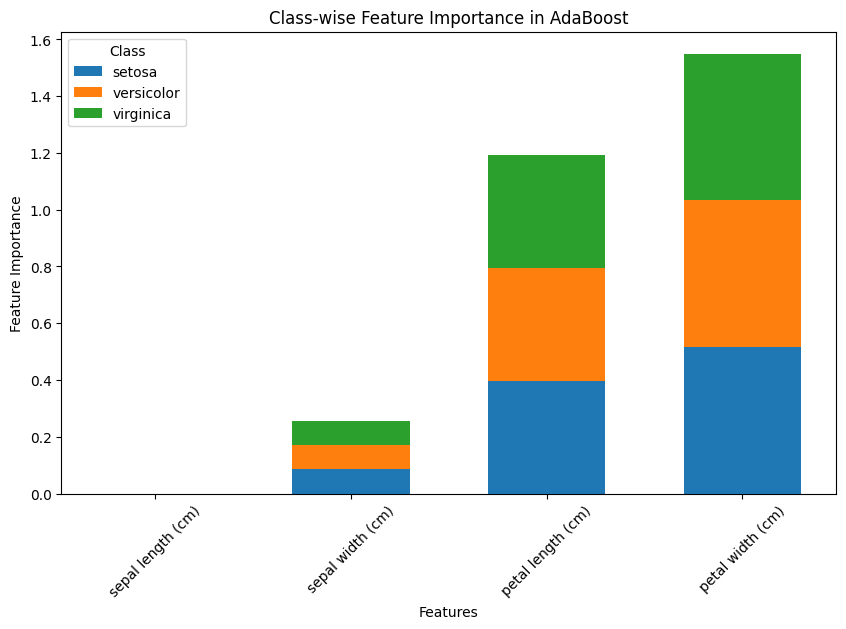

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target
feature_names = np.array(data.feature_names)
class_names = data.target_names  # Class labels

# Split dataset
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=90)

# Define base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)

# Define parameter grid
param_grid = {"n_estimators": [10, 50, 100]}

# GridSearchCV for best hyperparameter selection
grid = GridSearchCV(AdaBoostClassifier(estimator=base_estimator), param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(train_X, train_y)

# Best classifier
classifier = grid.best_estimator_
print(classifier.estimator_params)

# Make predictions
predictions = classifier.predict(test_X)

# Print results
print(f"Best n_estimators: {grid.best_params_['n_estimators']}")
print(f"Accuracy: {accuracy_score(test_y, predictions)}")

# ---- Multi-Class Feature Importance ----
# Extract feature importances from all weak learners
n_classes = len(np.unique(y))
n_features = X.shape[1]

# Initialize an array to store feature importance per class
feature_importances_per_class = np.zeros((n_classes, n_features))

# Iterate over weak learners
for i, tree in enumerate(classifier.estimators_):
    tree_importance = tree.feature_importances_
    # print(tree_importance)

    # Assign the importance to the class it primarily affects
    affected_class = classifier.estimator_weights_[i]  # Estimator weight (amount of say)
    for j in range(n_classes):
      feature_importances_per_class[int(j % n_classes)] += tree_importance * affected_class

# Normalize importance per class
feature_importances_per_class /= feature_importances_per_class.sum(axis=1, keepdims=True)

# Plot feature importances per class
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.6
x = np.arange(n_features)

# Plot stacked bar chart
bottom = np.zeros(n_features)
for class_idx in range(n_classes):
    ax.bar(x, feature_importances_per_class[class_idx], bar_width, label=class_names[class_idx], bottom=bottom)
    bottom += feature_importances_per_class[class_idx]

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(feature_names, rotation=45)
ax.set_xlabel("Features")
ax.set_ylabel("Feature Importance")
ax.set_title("Class-wise Feature Importance in AdaBoost")
ax.legend(title="Class")
plt.show()


In [38]:
np.zeros((n_classes, n_features))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

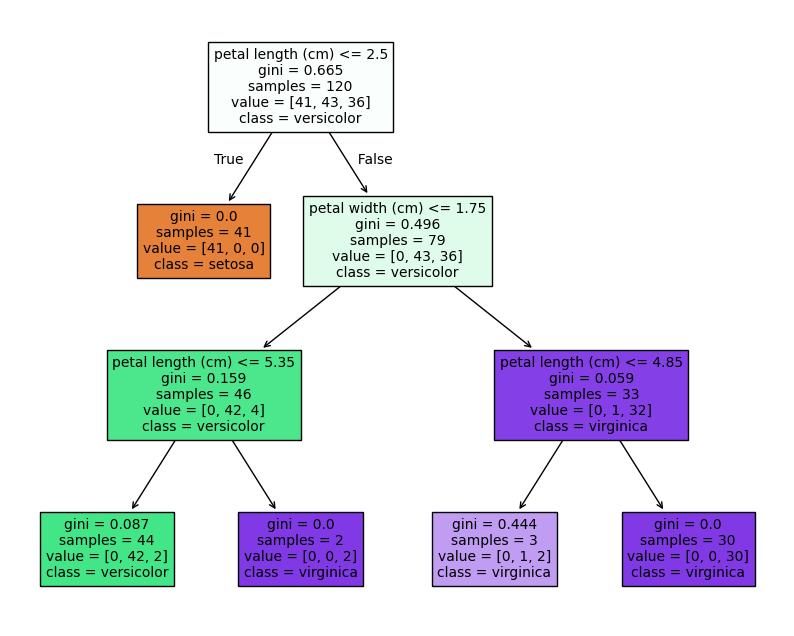

In [39]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(train_X, train_y)
predictions = tree.predict(test_X)
accuracy_score(test_y, predictions)

plt.figure(figsize=(10, 8))
plot_tree(tree, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()

<BarContainer object of 4 artists>

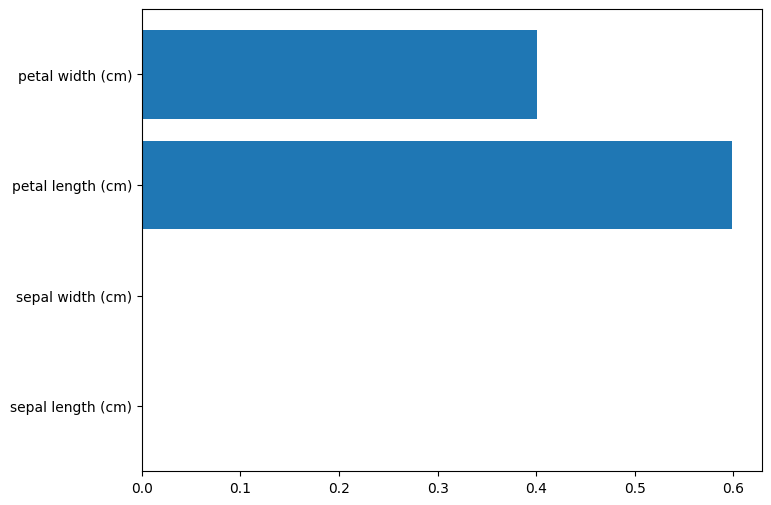

In [40]:
plt.figure(figsize=(8, 6))
plt.barh(data.feature_names, tree.feature_importances_)